In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\amhlo\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
# all dependencies 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(100)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CONFIRMED,0,0,0,0,8.103633,2.030000e-05,-2.030000e-05,176.948600,0.002050,...,-146,4.574,0.054,-0.041,0.732,0.062,-0.068,283.22141,40.421829,15.289
96,CONFIRMED,0,0,0,0,4.715108,1.940000e-05,-1.940000e-05,134.961780,0.003240,...,-146,4.574,0.054,-0.041,0.732,0.062,-0.068,283.22141,40.421829,15.289
97,CONFIRMED,0,0,0,0,6.365840,8.060000e-06,-8.060000e-06,171.135750,0.001000,...,-155,4.554,0.042,-0.168,0.849,0.212,-0.071,291.14951,40.420521,15.090
98,CONFIRMED,0,0,0,0,3.040330,3.370000e-07,-3.370000e-07,169.949011,0.000089,...,-151,4.519,0.084,-0.063,0.791,0.071,-0.087,299.31610,40.822380,15.028


In [5]:
print(df.columns)

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
# Features are selected from the top 10 from the Random Forest model
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_prad', 'koi_model_snr', 
                       'koi_prad_err2', 'koi_duration_err2', 'koi_prad_err1', 'koi_duration_err1']]
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_prad,koi_model_snr,koi_prad_err2,koi_duration_err2,koi_prad_err1,koi_duration_err1
0,0,0,0,0,2.83,25.8,-0.19,-0.11600,0.32,0.11600
1,0,1,0,0,14.60,76.3,-1.31,-0.03410,3.92,0.03410
2,0,1,0,0,33.46,505.6,-2.83,-0.00537,8.50,0.00537
3,0,0,0,0,2.75,40.9,-0.35,-0.04200,0.88,0.04200
4,0,0,0,0,2.77,40.2,-0.30,-0.06730,0.90,0.06730


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
# set X and y variables
X = selected_features
y = df['koi_disposition']

In [8]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Find the best K

k: 1, Train/Test Score: 1.000/0.838
k: 3, Train/Test Score: 0.916/0.869
k: 5, Train/Test Score: 0.903/0.878
k: 7, Train/Test Score: 0.892/0.880
k: 9, Train/Test Score: 0.890/0.879
k: 11, Train/Test Score: 0.888/0.878
k: 13, Train/Test Score: 0.887/0.881
k: 15, Train/Test Score: 0.885/0.884
k: 17, Train/Test Score: 0.886/0.882


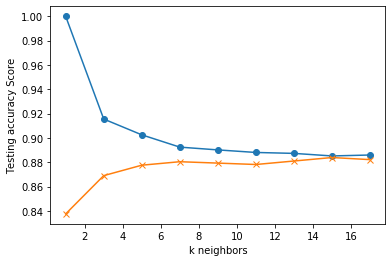

In [10]:
#Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 18, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 18, 2), train_scores, marker='o')
plt.plot(range(1, 18, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Training Acc: %.3f' % knn.score(X_train_scaled, y_train))
print('k=13 Testing Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Training Acc: 0.887
k=13 Testing Acc: 0.881


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [12]:
# Create the GridSearchCV model
# for kNN use: https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 9, 31, 51],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(knn, param_grid, verbose = 1)

In [13]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=13, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 9, 31, 51],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [14]:
print(grid.best_score_)

0.8769753454762442


In [15]:
print(grid.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')


In [16]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 31, 'weights': 'uniform'}


In [17]:
# calculate the classification report
from sklearn.metrics import classification_report
predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.82      0.68      0.74       411
     CONFIRMED       0.77      0.85      0.81       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.85      1748
  weighted avg       0.88      0.88      0.88      1748



In [18]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label
from sklearn.metrics import confusion_matrix
predictions = grid.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))

[[279 126   6]
 [ 61 412  11]
 [  2   0 851]]


# Save the Model

In [19]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Austin_modelKNN.sav'
joblib.dump(knn, filename)

['Austin_modelKNN.sav']